In [2]:
import oritelib as orite
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fasta = orite.seq_from_fasta("test_data/GCF_000009045.1_ASM904v1_genomic.fna")

In [4]:
print(fasta[0:30])

ATCTTTTTCGGCTTTTTTTAGTATCCACAG


In [5]:
len(fasta)

4162910

In [6]:
f0 = fasta
f1 = fasta[500000:]+fasta[0:500000]
f2 = fasta[1000000:]+fasta[0:1000000]
f3 = fasta[2000000:]+fasta[0:2000000]



In [7]:
f0_skew = orite.gc_skew_sliding_window(f0, 300000)
f1_skew = orite.gc_skew_sliding_window(f1, 300000)
f2_skew = orite.gc_skew_sliding_window(f2, 300000)
f3_skew = orite.gc_skew_sliding_window(f3, 300000)


seq len:  4162910
window_rad:  300000
extended seq length:  4762910


KeyboardInterrupt: 

In [ ]:
plt.plot(f0_skew[0])


In [ ]:
def skew_from_max(f, window_radius = 50000):
     
    gc, cgc = orite.gc_skew_sliding_window(f, window_rad=window_radius)
    
    max_indx = np.argmax(gc)
    
    new = f[max_indx:] + f[0:max_indx] 
    new_gc, new_cgc = orite.gc_skew_sliding_window(new, window_rad=window_radius)
    
    cGC_max_indx = np.argmax(new_cgc)
    
    final = new[cGC_max_indx:] + new[0:cGC_max_indx] 
    
    final_gc, final_cgc = orite.gc_skew_sliding_window(final, window_rad=window_radius)
    
    
    return final_gc, final_cgc
    

In [ ]:
x0 = skew_from_max(f0)
x1 = skew_from_max(f1)
x2 = skew_from_max(f2)
x3 = skew_from_max(f3)

In [ ]:
plt.figure(figsize=[20,10])
plt.plot(x0[0], 'x')
plt.plot(x1[0], 'o')
plt.plot(x2[0], '-')
plt.plot(x3[0])

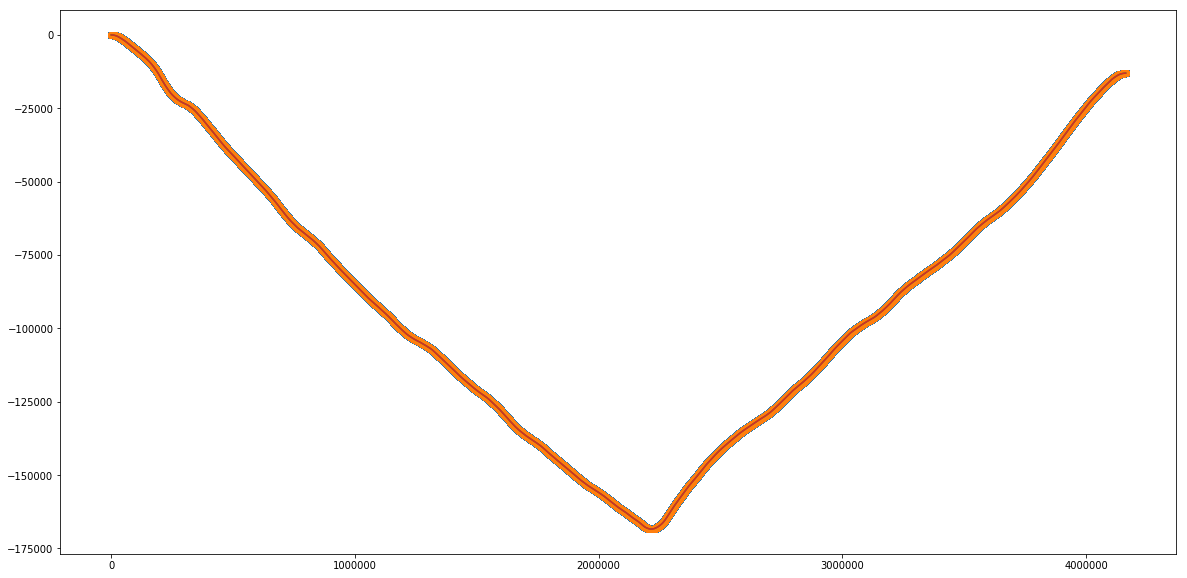

In [11]:
plt.figure(figsize=[20,10])
plt.plot(x0[1], 'x')
plt.plot(x1[1], 'o')
plt.plot(x2[1], '-')
plt.plot(x3[1])

In [12]:
min_arg = np.argmin(x0[1])

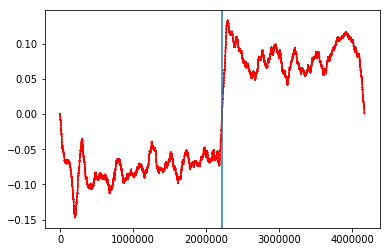

In [18]:
plt.plot(x3[0], 'r')
plt.axvline(x = min_arg)